In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
pd.set_option('display.float_format',lambda  x: '%.3f' % x)


C:\Users\Kaniska Jain\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
pip install --upgrade openpyxl


In [3]:
file_path = r"C:\Users\Kaniska Jain\Documents\DATA SCIENCE\PYTHON\case studies\Case Study 2 - Credit Card Case Study\Credit Card Data.xlsx"
customer = pd.read_excel(file_path, sheet_name='Customer Acqusition')
spend = pd.read_excel(file_path, sheet_name='Spend')
repayment = pd.read_excel(file_path, sheet_name='Repayment')



In [4]:
customer

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,34.012,BANGALORE,Gold,500000,C1,Self Employed
1,2,A2,50.497,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,3,A3,35.856,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,4,A4,27.357,BOMBAY,Platimum,10001,C4,Govt
4,5,A5,22.021,BANGALORE,Platimum,10002,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,71.083,CHENNAI,Silver,100000,C19,Salaried_Pvt
96,97,A97,69.881,TRIVANDRUM,Platimum,10000,C20,Govt
97,98,A98,20.952,CALCUTTA,Platimum,10001,C21,Normal Salary
98,99,A99,52.457,CALCUTTA,Platimum,10002,C22,Self Employed


In [5]:
spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,344054.981
1,2,A1,2004-01-03,PETRO,467747.602
2,3,A1,2004-01-15,CLOTHES,86878.955
3,4,A1,2004-01-25,FOOD,269175.012
4,5,A1,2005-01-17,CAMERA,3406.639
...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,418316.711
1496,1497,A68,2006-03-25,BUS TICKET,222182.008
1497,1498,A69,2006-03-31,BUS TICKET,100049.079
1498,1499,A70,2006-03-23,BUS TICKET,316308.254


In [6]:
repayment

,SL No:,Customer,Month,Amount
0,1,A1,2004-01-12,338932.142
1,2,A1,2004-01-03,131778.689
2,3,A1,2004-01-15,485981.517
3,4,A1,2004-01-25,452865.826
4,5,A1,2005-01-17,154684.838
...,...,...,...,...
1495,1496,A67,2005-05-09,461916.048
1496,1497,A68,2006-05-10,269635.645
1497,1498,A69,2006-07-11,181524.046
1498,1499,A70,2005-08-12,308330.678


In [7]:
data=pd.merge(customer,spend,how='inner',on='Customer')
data_repay=pd.merge(customer,repayment,how='inner',on='Customer')


# 1. In the above dataset,

## a. In case age is less than 18, replace it with mean of age values

In [8]:
customer.loc[customer['Age'] < 18, 'Age'] = customer['Age'].mean()

In [9]:
customer["Age"].mean()

44.4202545180456

## b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)


In [10]:
data.shape

(1500, 12)

In [11]:
data.loc[data["Amount"] > data["Limit"],"Amount"] = (data["Limit"]*50 ).div(100)

In [12]:
data[data["Amount"] > data['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount


##  c. Incase the repayment amount is more than the limit, replace the repayment with the   limit. 

In [13]:
data_repay[data_repay['Amount']> data_repay['Limit']]
data_repay.loc[data_repay['Amount']> data_repay['Limit'],'Amount']=data_repay['Limit']

In [14]:
data_repay[data_repay['Amount']> data_repay['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount


# 2. From the above dataset create the following summaries:



### a. How many distinct customers exist?


In [15]:
distinct_cust = data["Customer"].nunique()
distinct_cust

100

### b. How many distinct categories exist? 

In [16]:
dist_category=data.Product.value_counts()
dist_category

Product
Gold        610
Platimum    570
Silver      320
Name: count, dtype: int64

### c. What is the average monthly spend by customers? 

In [17]:
data['Month_name'] = data.Month.apply(lambda x : pd.Timestamp.strftime(x, format = '%B'))
avg_spend_monthly = data.groupby(['Customer','Month_name'])[['Amount']].mean().round(2)


In [18]:
avg_spend_monthly

Amount
Customer Month_name           
A1       April      459842.300
         August     305194.320
         February   407517.810
         January    246216.560
         May        203037.490
...                        ...
A95      January    281975.210
A96      January     94369.180
A97      January      5000.000
A98      January      5000.500
A99      January      5001.000

[578 rows x 1 columns]

### d. What is the average monthly repayment by customers?

In [19]:

data_repay['Month_name']=data_repay.Month.apply(lambda x: pd.Timestamp.strftime(x,format='%B'))
avg_repay_monthly = data_repay.groupby(['Customer','Month_name'])[['Amount']].mean().round(2)
avg_repay_monthly

Amount
Customer Month_name           
A1       April      341465.780
         February   181723.000
         January    277759.920
         July       149833.580
         November   421565.060
...                        ...
A95      January    381370.440
A96      January    100000.000
A97      January     10000.000
A98      January     10001.000
A99      January     10002.000

[558 rows x 1 columns]

### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)


In [20]:
profit=pd.merge(left =avg_spend_monthly, right = avg_repay_monthly, left_on=['Customer','Month_name'],right_on=['Customer','Month_name'],how='inner').reset_index()
profit       

,Customer,Month_name,Amount_x,Amount_y
0,A1,April,459842.300,341465.780
1,A1,February,407517.810,181723.000
2,A1,January,246216.560,277759.920
3,A1,November,159428.400,421565.060
4,A10,April,134735.800,210116.430
...,...,...,...,...
449,A95,January,281975.210,381370.440
450,A96,January,94369.180,100000.000
451,A97,January,5000.000,10000.000
452,A98,January,5000.500,10001.000


In [21]:
profit.rename(columns={'Amount_x':'spend_Amount','Amount_y':'repay_Amount'},inplace=True)


In [22]:
profit

,Customer,Month_name,spend_Amount,repay_Amount
0,A1,April,459842.300,341465.780
1,A1,February,407517.810,181723.000
2,A1,January,246216.560,277759.920
3,A1,November,159428.400,421565.060
4,A10,April,134735.800,210116.430
...,...,...,...,...
449,A95,January,281975.210,381370.440
450,A96,January,94369.180,100000.000
451,A97,January,5000.000,10000.000
452,A98,January,5000.500,10001.000


In [23]:
profit['monthly_profit']=profit['spend_Amount']-profit['repay_Amount']

In [24]:
profit

,Customer,Month_name,spend_Amount,repay_Amount,monthly_profit
0,A1,April,459842.300,341465.780,118376.520
1,A1,February,407517.810,181723.000,225794.810
2,A1,January,246216.560,277759.920,-31543.360
3,A1,November,159428.400,421565.060,-262136.660
4,A10,April,134735.800,210116.430,-75380.630
...,...,...,...,...,...
449,A95,January,281975.210,381370.440,-99395.230
450,A96,January,94369.180,100000.000,-5630.820
451,A97,January,5000.000,10000.000,-5000.000
452,A98,January,5000.500,10001.000,-5000.500


In [25]:
profit['Real_profit'] = np.where(profit['monthly_profit'] > 0, profit['monthly_profit'] * 2.9 / 100, np.NaN)

In [26]:
profit

,Customer,Month_name,spend_Amount,repay_Amount,monthly_profit,Real_profit
0,A1,April,459842.300,341465.780,118376.520,3432.919
1,A1,February,407517.810,181723.000,225794.810,6548.049
2,A1,January,246216.560,277759.920,-31543.360,NaN
3,A1,November,159428.400,421565.060,-262136.660,NaN
4,A10,April,134735.800,210116.430,-75380.630,NaN
...,...,...,...,...,...,...
449,A95,January,281975.210,381370.440,-99395.230,NaN
450,A96,January,94369.180,100000.000,-5630.820,NaN
451,A97,January,5000.000,10000.000,-5000.000,NaN
452,A98,January,5000.500,10001.000,-5000.500,NaN


###  f. What are the top 5 product types?

In [27]:
data[['Type']].value_counts().head().reset_index()


,Type,count
0,PETRO,200
1,CAMERA,160
2,FOOD,160
3,AIR TICKET,147
4,TRAIN TICKET,132


### g. Which city is having maximum spend?


In [28]:
b=data.groupby('City')[['Amount']].sum()
b.sort_values(by='Amount',ascending=False).reset_index()

,City,Amount
0,COCHIN,48574542.863
1,BANGALORE,44322352.462
2,CALCUTTA,41182214.478
3,BOMBAY,30697690.243
4,CHENNAI,22791102.613
5,TRIVANDRUM,15558181.641
6,PATNA,13116206.440
7,DELHI,12486307.241


### h. Which age group is spending more money?
 

### i. Who are the top 10 customers in terms of repayment?

In [29]:
 
data_repay.groupby('Customer')[['Amount']].sum().sort_values('Amount',ascending=False).reset_index().head(10)

,Customer,Amount
0,A61,9672793.517
1,A60,9168149.951
2,A42,8928473.481
3,A13,8496395.779
4,A38,8205336.504
5,A43,7976031.146
6,A40,7671795.783
7,A14,7655254.888
8,A44,7637481.576
9,A26,7472188.587


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical    representation for the same. 

In [30]:
Q3=data
Q3['year']=Q3.Month.apply(lambda x : pd.Timestamp.strftime(x, format = '%Y'))

In [31]:
# It is first method 
Q3.groupby(['City','year','Product'])[['Amount']].sum().head(20)

Amount
City      year Product              
BANGALORE 2004 Gold      9870697.480
               Platimum  1045045.915
               Silver    1215574.948
          2005 Gold     14914471.021
               Platimum   885722.610
               Silver     909077.886
          2006 Gold     13121349.451
               Platimum   709694.487
               Silver    1650718.664
BOMBAY    2004 Gold      6221750.002
               Platimum   946976.342
               Silver     518676.335
          2005 Gold      9533804.393
               Platimum   836008.475
               Silver     572757.221
          2006 Gold     10196028.748
               Platimum  1022213.943
               Silver     849474.783
CALCUTTA  2004 Gold      8643979.178
               Platimum  2178863.268

In [32]:
# it is second method using pivot table
pivot = pd.pivot_table(data=Q3,index=['City','year'],columns='Product',aggfunc='sum',values='Amount')
pivot

Product                 Gold    Platimum      Silver
City       year                                     
BANGALORE  2004  9870697.480 1045045.915 1215574.948
           2005 14914471.021  885722.610  909077.886
           2006 13121349.451  709694.487 1650718.664
BOMBAY     2004  6221750.002  946976.342  518676.335
           2005  9533804.393  836008.475  572757.221
           2006 10196028.748 1022213.943  849474.783
CALCUTTA   2004  8643979.178 2178863.268  597488.360
           2005 11691980.021 4822990.047  343259.508
           2006  9571088.344 2456411.614  876154.137
CHENNAI    2004  1415072.877 2944114.925  308774.691
           2005  3013080.934 5243051.170  428758.513
           2006  3057965.844 6066895.556  313388.102
COCHIN     2004  9730434.546 2974235.357  789194.949
           2005 11025312.809 4151462.729  643789.217
           2006 12628278.512 5530968.852 1100865.891
DELHI      2004  3467979.095  338842.131  804097.082
           2005  2508487.425  443619.822  493446.155
           2006  3535699.843  133365.046  760770.642
PATNA      2004  1915473.344  816637.266  844829.533
           2005  2187692.094 2534969.165  949455.257
           2006  2424509.409  745381.450  697258.922
TRIVANDRUM 2004  2272699.663 1770528.162  272908.775
           2005  1984570.774 3401178.636  372614.286
           2006  2827396.988 2122721.648  533562.709

## 4. Create graphs for

### a. Monthly comparison of total spends, city wise


In [33]:
data.groupby(['City','Month_name'])[['Amount']].sum()

Amount
City       Month_name            
BANGALORE  April      4468678.341
           August      935045.934
           December    520055.425
           February   9665622.829
           January    8698112.957
...                           ...
TRIVANDRUM March      2078068.346
           May        3094850.053
           November    424981.985
           October      90578.407
           September   249504.876

[96 rows x 1 columns]

In [34]:

s=pd.pivot_table(data=data,index=['City'],columns='Month_name',aggfunc='sum',values='Amount')
s

Month_name,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4468678.341,935045.934,520055.425,9665622.829,8698112.957,1346916.255,1638355.481,6269726.792,6587196.163,2630153.877,768905.279,793583.130
BOMBAY,3177458.693,1536633.269,121049.442,4765353.126,5661072.861,349778.726,1440822.991,5952910.666,3104922.502,2907131.848,783115.708,897440.414
CALCUTTA,2935157.865,1521469.788,55001.500,7466320.034,10038315.790,2159126.324,1668323.877,4628120.965,6918039.165,2107053.605,71818.701,1613466.864
CHENNAI,3056521.732,398689.363,479115.791,3699002.690,4770126.102,923665.338,811236.703,3199793.057,2921097.905,1382168.108,250210.922,899474.903
COCHIN,3971056.473,2384455.823,598369.080,6392115.173,13225964.378,2186407.982,2258505.699,6574383.100,5921329.434,2756952.735,535749.480,1769253.506
DELHI,1243259.203,180464.589,817861.371,1619830.494,2703647.965,50001.500,271371.240,2940407.852,1479693.396,673962.712,489289.055,16517.863
PATNA,1458076.901,297807.504,50000.000,1965580.152,4735909.037,50000.000,722912.367,1694337.762,1360733.906,580253.457,113926.580,86668.773
TRIVANDRUM,1482495.425,318463.781,386484.104,2884352.362,3589692.764,457577.916,501131.621,2078068.346,3094850.053,424981.985,90578.407,249504.876


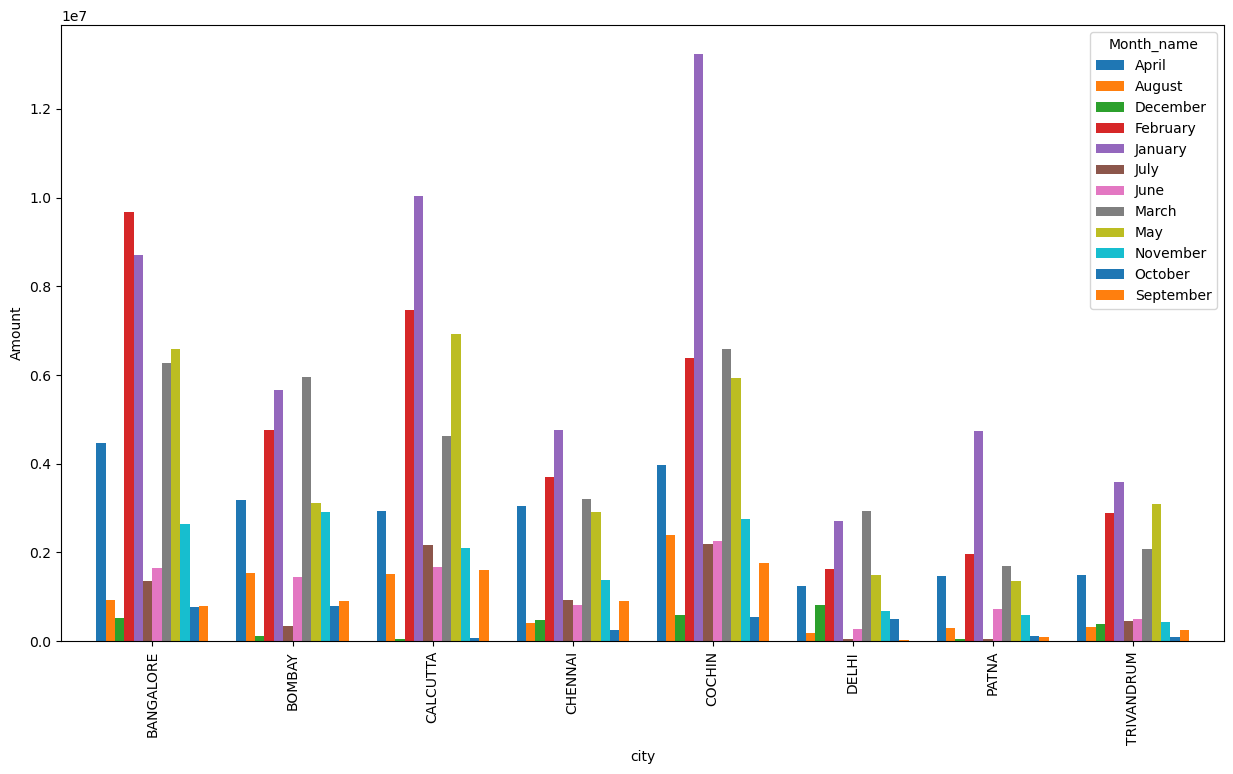

In [35]:
s.plot(kind="bar",figsize=(15,8),width=0.8)
plt.xlabel('city')
plt.ylabel('Amount')
plt.show()

### b. Comparison of yearly spend on air tickets 

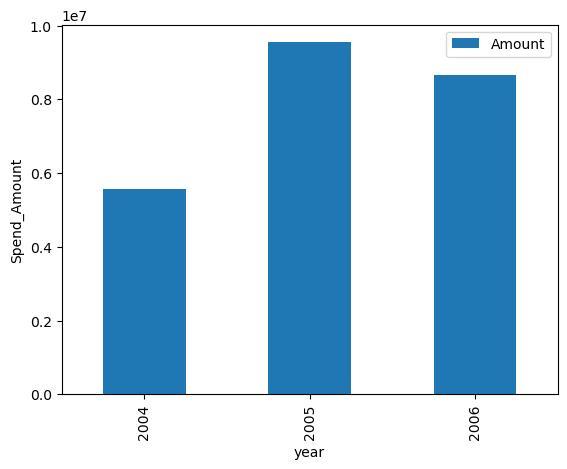

In [36]:
b=data.loc[data.Type == 'AIR TICKET'].groupby(['year'])[['Amount']].sum()
b.plot(kind = 'bar')
plt.ylabel('Spend_Amount')
plt.show()


###  c. Comparison of monthly spend for each product (look for any seasonality   that exists in terms of spend)


In [37]:
data.groupby(['Month_name','Product'])[['Amount']].sum()

Amount
Month_name Product              
April      Gold     14458677.471
           Platimum  5399854.392
           Silver    1934172.770
August     Gold      5563528.898
           Platimum  1706845.277
           Silver     302655.876
December   Gold      1937272.927
           Platimum   840661.787
           Silver     250002.000
February   Gold     27365779.677
           Platimum  8873153.668
           Silver    2219243.515
January    Gold     35380431.052
           Platimum 13791303.615
           Silver    4251107.187
July       Gold      4643751.108
           Platimum  2336502.677
           Silver     543220.255
June       Gold      6377463.152
           Platimum  2230767.753
           Silver     704429.073
March      Gold     23026120.246
           Platimum  7017555.349
           Silver    3294072.943
May        Gold     21791613.739
           Platimum  7475526.563
           Silver    2120722.223
November   Gold     10238728.141
           Platimum  2420481.872
           Silver     803448.314
October    Gold      2442833.420
           Platimum   560759.211
           Silver     100001.500
September  Gold      4533602.964
           Platimum  1468486.453
           Silver     323820.912

In [38]:
c=pd.pivot_table(data=data,index=['Month_name'],columns='Product',aggfunc='sum',values='Amount')
c

Product,Gold,Platimum,Silver
Month_name,,,
April,14458677.471,5399854.392,1934172.770
August,5563528.898,1706845.277,302655.876
December,1937272.927,840661.787,250002.000
February,27365779.677,8873153.668,2219243.515
January,35380431.052,13791303.615,4251107.187
July,4643751.108,2336502.677,543220.255
June,6377463.152,2230767.753,704429.073
March,23026120.246,7017555.349,3294072.943
May,21791613.739,7475526.563,2120722.223


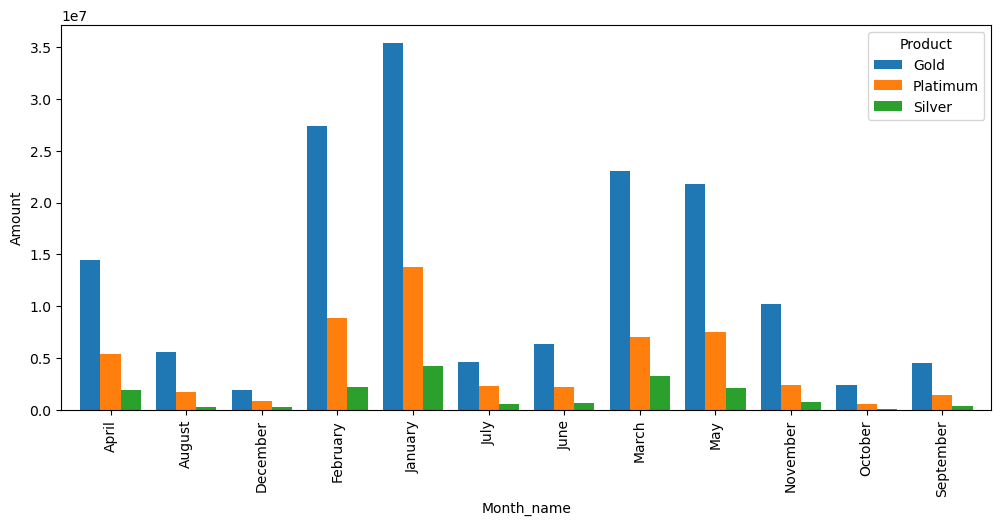

In [39]:
c.plot(kind = 'bar', figsize = (12,5), width = 0.8)
plt.ylabel('Amount')
plt.show()

## 5. Write user defined PYTHON function to perform the following analysis:

You need to find top 10 customers for each city in terms of their repayment amount by 
different products and by different time periods i.e. year or month. The user should be able 
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
function should automatically take these inputs while identifying the top 10 customers.

In [40]:
data.Product = np.where(data.Product == 'Platimum', 'Platinum', data.Product)

In [51]:
def top_ten_customer(product, time_period):
    return data.loc[data.Product == product].groupby(['Customer','City','Product', time_period])[['Amount']].sum().sort_values('Amount',ascending = False).head(10)


product = str(input("Please Enter Product Category and product category should be in Gold/Silver/Platinum: "))
time_period = str(input("Please Enter Time Period and time period should be in year/Month: "))
top_10 = top_ten_customer(product, time_period)
top_10

Please Enter Product Category and product category should be in Gold/Silver/Platinum: Silver
Please Enter Time Period and time period should be in year/Month: Month


,,,,Amount
Customer,City,Product,Month,
A77,BANGALORE,Silver,2006-02-04,329991.487
A79,COCHIN,Silver,2006-03-31,316669.806
A46,PATNA,Silver,2004-01-15,192629.495
A78,CALCUTTA,Silver,2006-03-25,169271.538
A59,BANGALORE,Silver,2004-01-12,159859.973
A80,BOMBAY,Silver,2006-03-23,150543.268
A24,DELHI,Silver,2004-01-25,150003.000
A23,BANGALORE,Silver,2004-01-15,150001.500
A7,COCHIN,Silver,2004-01-25,150001.500
